In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the listing dataset and show first few rows
listings = pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# read the calendar dataset and show first few rows
calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
reviews = listings[['review_scores_rating',
                'review_scores_accuracy', 'review_scores_cleanliness',
                'review_scores_checkin', 'review_scores_communication',
                'review_scores_location', 'review_scores_value']]

In [5]:
rooms = listings[['room_type', 'accommodates',
               'bathrooms', 'bedrooms', 'beds', 'bed_type']]

In [6]:
hosts = listings[['host_since', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost','extra_people']]

In [7]:
calendar['month'] = pd.to_datetime(calendar['date']).dt.month
calendar['year'] = pd.to_datetime(calendar['date']).dt.year

In [8]:
filtered_listings = pd.concat((reviews,rooms,hosts),axis=1)

In [9]:
filtered_listings.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,extra_people
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2011-08-11,96%,100%,f,$5.00
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2013-02-21,98%,100%,t,$0.00
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0,Entire home/apt,11,4.5,5.0,7.0,Real Bed,2014-06-12,67%,100%,f,$25.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,3,1.0,0.0,2.0,Real Bed,2013-11-06,NaN,NaN,f,$0.00
4,92.0,9.0,9.0,10.0,10.0,9.0,9.0,Entire home/apt,6,2.0,3.0,3.0,Real Bed,2011-11-29,100%,NaN,f,$15.00


In [10]:
filtered_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         3171 non-null   float64
 1   review_scores_accuracy       3160 non-null   float64
 2   review_scores_cleanliness    3165 non-null   float64
 3   review_scores_checkin        3160 non-null   float64
 4   review_scores_communication  3167 non-null   float64
 5   review_scores_location       3163 non-null   float64
 6   review_scores_value          3162 non-null   float64
 7   room_type                    3818 non-null   object 
 8   accommodates                 3818 non-null   int64  
 9   bathrooms                    3802 non-null   float64
 10  bedrooms                     3812 non-null   float64
 11  beds                         3817 non-null   float64
 12  bed_type                     3818 non-null   object 
 13  host_since        

In [11]:
filtered_listings = pd.concat((filtered_listings,listings['id']),axis=1)

In [12]:
filtered_listings.rename(index=str, columns={"id": "listing_id"}, inplace= True)

In [13]:
filtered_df= pd.merge(calendar, filtered_listings , on= 'listing_id')

In [14]:
filtered_df_1 = filtered_df.copy()
filtered_df_1.dropna(subset=['price'],inplace=True)

In [15]:
filtered_df_1['price'] = filtered_df_1['price'].str.replace("[$, ]", "").astype("float")

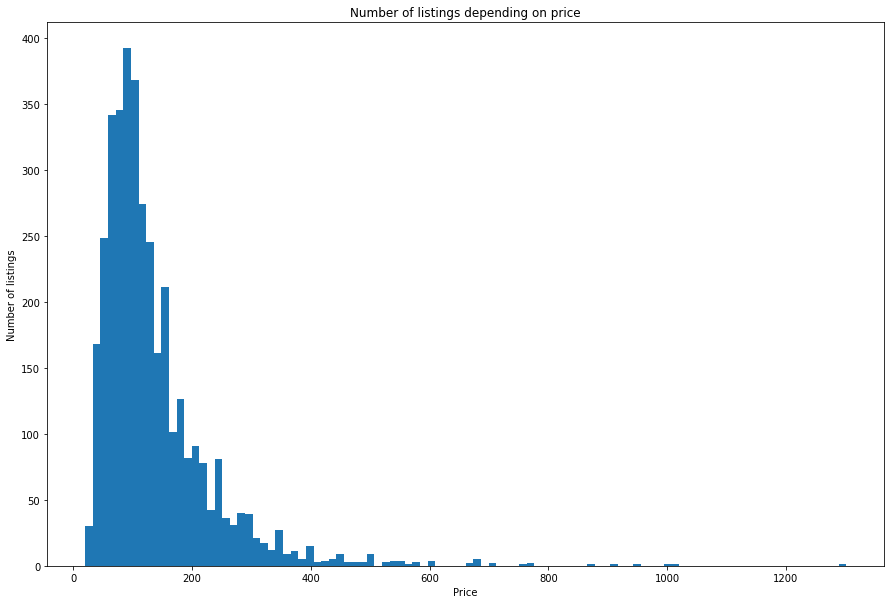

In [16]:
price = filtered_df_1.groupby('listing_id')['price'].mean()
plt.figure(figsize=(15,10))
plt.hist(price,bins=100)

plt.ylabel('Number of listings')
plt.xlabel('Price')
plt.title('Number of listings depending on price')

plt.savefig('Price distrubution.png')

plt.show()

Price of listings range between 25 USD to 350 USD.

In [17]:
reviews = ['review_scores_rating',
           'review_scores_accuracy', 'review_scores_cleanliness',
           'review_scores_checkin', 'review_scores_communication',
           'review_scores_location', 'review_scores_value']
for review in reviews:
    filtered_df_1[review].fillna(filtered_df_1[review].mean(),inplace=True) 

Impute the value for review columns with mean

In [18]:
room_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds']
for feature in room_features:
    filtered_df_1[feature].fillna(filtered_df_1[feature].mode()[0],inplace=True)

Impute the value for room features with mode

In [19]:
filtered_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   934542 non-null  int64  
 1   date                         934542 non-null  object 
 2   available                    934542 non-null  object 
 3   price                        934542 non-null  float64
 4   month                        934542 non-null  int64  
 5   year                         934542 non-null  int64  
 6   review_scores_rating         934542 non-null  float64
 7   review_scores_accuracy       934542 non-null  float64
 8   review_scores_cleanliness    934542 non-null  float64
 9   review_scores_checkin        934542 non-null  float64
 10  review_scores_communication  934542 non-null  float64
 11  review_scores_location       934542 non-null  float64
 12  review_scores_value          934542 non-null  float64
 13

Below I selected features which I think must be influencing the price.

In [20]:
corr_cols = ['review_scores_rating',
             'review_scores_accuracy', 'review_scores_cleanliness',
             'review_scores_checkin', 'review_scores_communication',
             'review_scores_location', 'review_scores_value','accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']

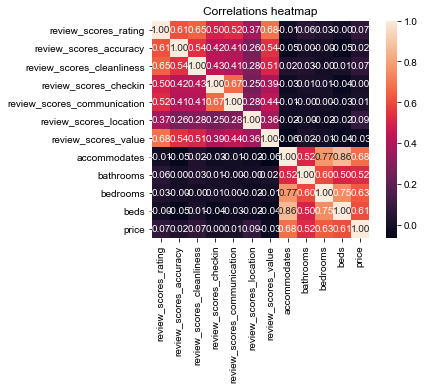

In [21]:
corrs = np.corrcoef(filtered_df_1[corr_cols].values.T)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = corr_cols, xticklabels = corr_cols).set_title('Correlations heatmap')

sns.set(rc={'figure.figsize':(20,20)})
fig = hm.get_figure()
fig.savefig('correlations.png')

From the above correlations heatmap diagram we can see that price is correlated with number of accomodates, bathrooms, bedrooms and beds.